In [0]:
!pip install kaggle
!pip install numpy
!pip install pandas
!pip install matplotlib

In [0]:
#Colab files access:
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#moving and changing permission of the files.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
#list competitions:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2562           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10364           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4067           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         36           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2567           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
aerial-c

In [0]:
!kaggle competitions download -c nyc-taxi-trip-duration

  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 81.9MB/s]
 25% 5.00M/20.3M [00:00<00:00, 29.2MB/s]
100% 20.3M/20.3M [00:00<00:00, 79.8MB/s]
 75% 47.0M/62.9M [00:00<00:00, 65.8MB/s]
100% 62.9M/62.9M [00:00<00:00, 141MB/s] 


In [0]:
!ls

sample_data  sample_submission.zip  test.zip  train.zip


In [0]:
#Data Dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False



In [0]:
!unzip test.zip
!unzip train.zip
!ls

Archive:  test.zip
  inflating: test.csv                
Archive:  train.zip
  inflating: train.csv               
sample_data  sample_submission.zip  test.csv  test.zip	train.csv  train.zip


In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_train.head(15)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


<function matplotlib.pyplot.show>

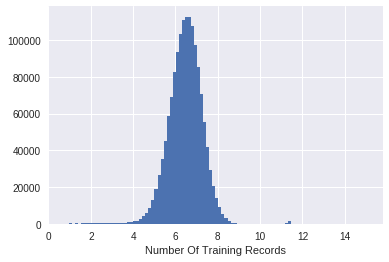

In [0]:
#data preprocessing

#first we try to find the average trip

df_train['LTD'] = np.log(df_train['trip_duration'].values +1)
plt.hist(df_train['LTD'].values, bins=100)
plt.xlabel('Log Of Trip Duration')
plt.xlabel('Number Of Training Records')
plt.show

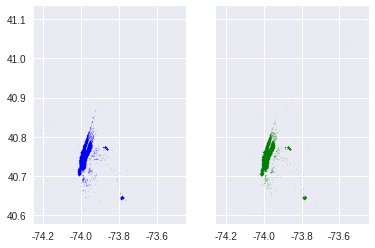

In [0]:
N = 10000
city_longitude = (-60,-60)
city_latitude = (120,120)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values[:N], 
              df_train['pickup_latitude'].values[:N], 
              color= 'blue', s=1, label='Train',alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:N], 
              df_test['pickup_latitude'].values[:N], 
              color= 'green', s=1, label='Test',alpha=0.1)

plt.show()

In [0]:
df_train.columns[10]

'trip_duration'

In [0]:
#training the model
from sklearn.model_selection import ShuffleSplit

from subprocess import check_output

features_names = list(df_train.columns)
#features = df_train['vendor_id','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pu_hour','wday','month','workday','precipitation','snowfall','snowdepth','total_distance','total_travel_time','jfk','lga']
features = df_train.columns[1:10]
#target = df_train['trip_duration']
target = df_train.columns[10]

#tfeatures = df_test['vendor_id','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pu_hour','wday','month','workday','precipitation','snowfall','snowdepth','total_distance','total_travel_time','jfk','lga']
tfeatures = df_test.columns[1:10]

y = np.log(df_train['trip_duration'].values + 1)
xtr, xtv, ytr, yv = train_test_split(df_train[features].values, y, test_size=0.2, random_state=0)

params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 1, 
             'max_depth': 7, 'min_child_weight': 1,'learning_rate': 0.1, 'subsample': 0.8}
reg = xgb.XGBRegressor(n_estimators=100, seed=0,learning_rate=0.1, subsample=0.8,
                           colsample_bytree=1, max_depth=7,min_child_weight= 1)

#cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
#print(cross_val_score(reg, features, np.ravel(target), cv=cv,scoring=rmsle))
reg.fit(features,target)


TypeError: ignored

In [0]:
list(df_train.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'LTD']